<a href="https://colab.research.google.com/github/a1ire3a/frequency-domain-filter/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Noise**

In [ ]:
import numpy as np
import cv2
import urllib.request as url
from skimage.util import random_noise
from google.colab.patches import cv2_imshow

load library

In [ ]:
req = url.urlopen("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)

load image

In [ ]:
gaussianIMG1 = np.array(255 * random_noise(img, mode='gaussian',mean=0, var=0.01)).astype(int)
gaussianIMG2 = np.array(255 * random_noise(img, mode='gaussian',mean=0, var=0.1)).astype(int)
gaussianIMG3 = np.array(255 * random_noise(img, mode='gaussian',mean=0, var=0.5)).astype(int)

create 3 noisy image with 0.01, 0.1 and 0.5 Standard deviation of gaussian noise

In [ ]:
def Noise(img, des):
    f = np.fft.fft2(img)
    fs = np.fft.fftshift(f)
    #cv2_imshow(fs)

    fd = np.fft.fft2(des)
    fsd = np.fft.fftshift(fd)
    #cv2_imshow(fsd)

    noise = fsd / fs
    #cv2_imshow(noise)
    isn = np.fft.ifftshift(noise)
    ifn = np.fft.ifft2(isn)

    return(255*ifn)

in this function, move the original image and destored image to the frequency domain, divide destored by original to get noise beacause variations are linear in frequency domain, then inverse noise to temporal domain to show

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


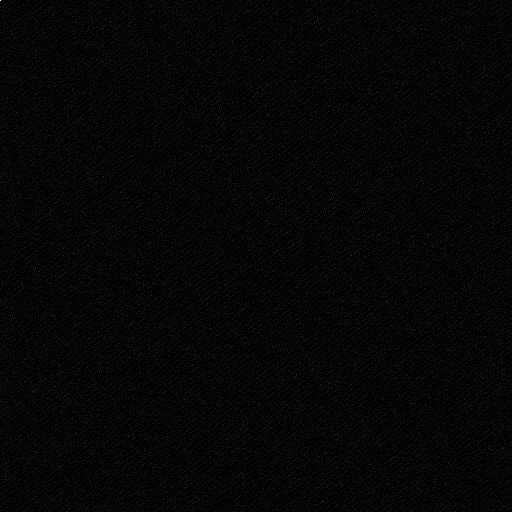

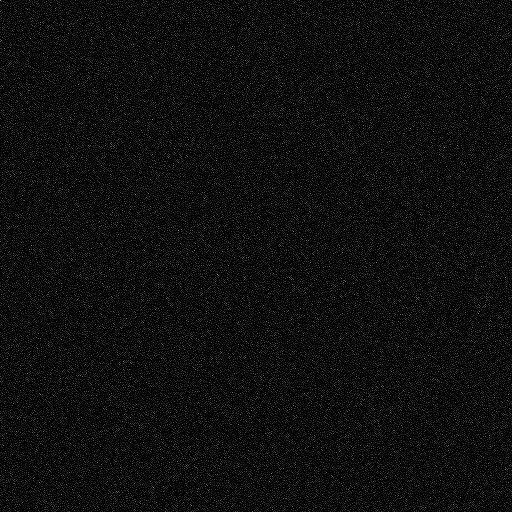

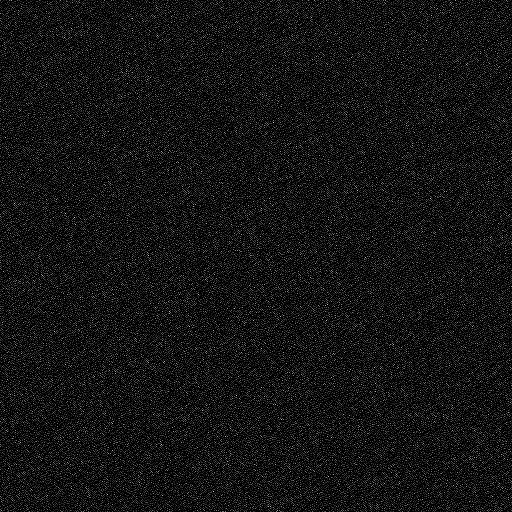

In [ ]:
cv2_imshow(Noise(img,gaussianIMG1))
cv2_imshow(Noise(img,gaussianIMG2))
cv2_imshow(Noise(img,gaussianIMG3))

1st is noise with 0.01 Standard deviation

2nd is noise with 0.1 Standard deviation

3rd is noise with 0.5 Standard deviation